In [1]:
import pandas as pd
countries = pd.read_csv('https://raw.githubusercontent.com/WHPAN0108/BHT-DataScience-S23/main/clustering/data/country.txt')
countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.200,66.2,2.64,2650
1,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480
2,Malawi,90.5,22.8,6.59,34.9,1030,12.100,53.1,5.31,459
3,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.800,57.5,6.54,334
...,...,...,...,...,...,...,...,...,...,...
146,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200
147,Costa Rica,10.2,33.2,10.90,35.0,13000,6.570,80.4,1.92,8200
148,Colombia,18.6,15.9,7.59,17.8,10900,3.860,76.4,2.01,6250
149,Montenegro,6.8,37.0,9.11,62.7,14000,1.600,76.4,1.77,6680


In [2]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     151 non-null    object 
 1   child_mort  151 non-null    float64
 2   exports     151 non-null    float64
 3   health      151 non-null    float64
 4   imports     151 non-null    float64
 5   income      151 non-null    int64  
 6   inflation   151 non-null    float64
 7   life_expec  151 non-null    float64
 8   total_fer   151 non-null    float64
 9   gdpp        151 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 11.9+ KB


In [3]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,37.905960,40.447013,6.790530,46.351430,17899.423841,7.857536,70.774172,2.934305,13636.324503
std,40.749021,28.196914,2.781353,24.614163,19801.730058,10.973978,9.011529,1.512132,18766.269648
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,7.850000,22.800000,4.850000,29.950000,3850.000000,1.730000,65.450000,1.820000,1485.000000
50%,19.100000,34.800000,6.220000,43.000000,10400.000000,5.140000,73.400000,2.410000,5020.000000
75%,60.400000,50.950000,8.690000,57.500000,26200.000000,10.350000,77.000000,3.750000,16850.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# dropping the non-numerical column
countries2=countries.drop(['country'],axis=1)

<Axes: >

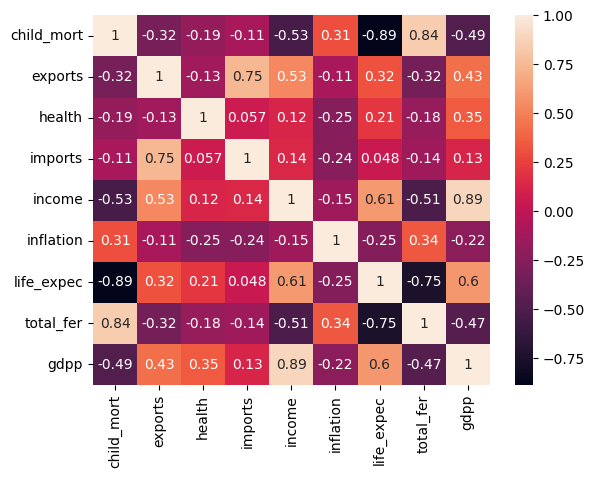

In [8]:
# visualize correlations between columns
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix=countries2.corr()
sns.heatmap(corr_matrix,annot=True)

High positive correlation between gdpp and income, total_fer and child_mort, imports and exports.
High negative correlation between life_expec and child_mort, life_expec and total_fer.

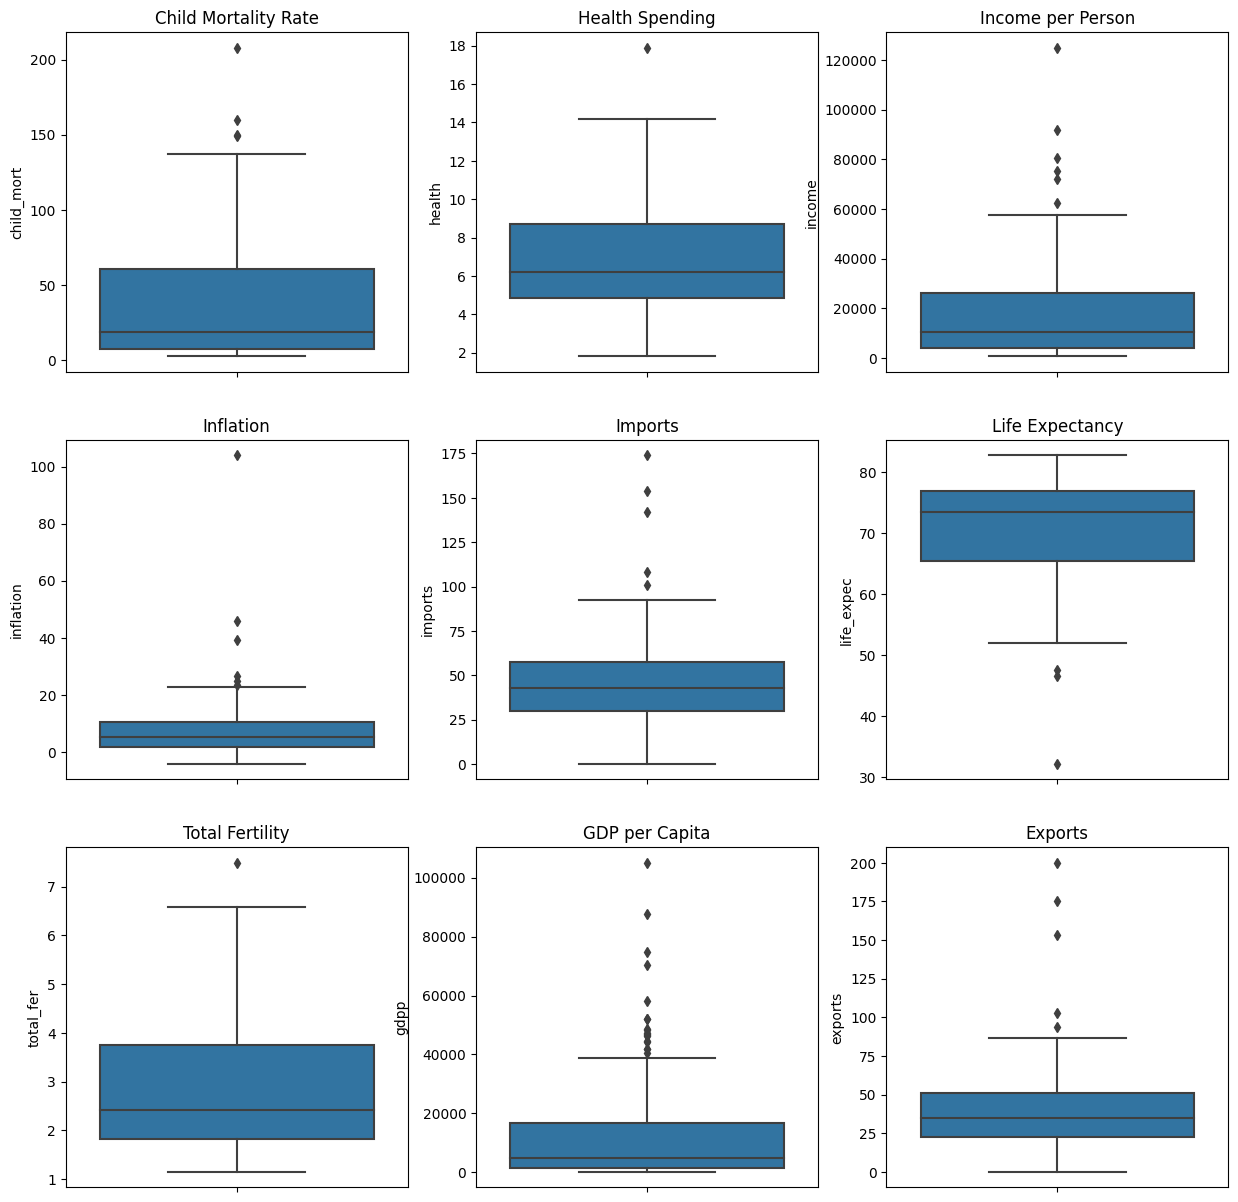

In [10]:
# Box plot for outliers
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
bp=sns.boxplot(y=countries2.child_mort,ax=ax[0, 0])
ax[0, 0].set_title('Child Mortality Rate')
bp=sns.boxplot(y=countries2.health,ax=ax[0, 1])
ax[0, 1].set_title('Health Spending')
bp=sns.boxplot(y=countries2.income,ax=ax[0, 2])
ax[0,2].set_title('Income per Person')
bp=sns.boxplot(y=countries2.inflation,ax=ax[1, 0])
ax[1,0].set_title('Inflation')
bp=sns.boxplot(y=countries2.imports,ax=ax[1,1])
ax[1, 1].set_title('Imports')
s=sns.boxplot(y=countries2.life_expec,ax=ax[1, 2])
ax[1,2].set_title('Life Expectancy')
s=sns.boxplot(y=countries2.total_fer,ax=ax[2,0])
ax[2,0].set_title('Total Fertility')
s=sns.boxplot(y=countries2.gdpp,ax=ax[2, 1])
ax[2,1].set_title('GDP per Capita')
s=sns.boxplot(y=countries2.exports,ax=ax[2,2])
ax[2,2].set_title('Exports')
plt.show()

We have lots of outliers in all columns.

In [12]:
# Scaling data
import sklearn
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
scaled=scaling.fit_transform(countries2)
scaled_countries=pd.DataFrame(scaled,columns=countries2.columns)
scaled_countries.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,-0.290688,0.222499,-0.487182,0.421831,-0.516285,2.865576,-0.509280,-0.195277,-0.587378
1,0.955192,-0.738239,-0.169736,-1.188277,-0.736187,1.073589,-0.498146,1.291005,-0.649931
2,1.294977,-0.627932,-0.072338,-0.466786,-0.854752,0.387880,-1.967811,1.576318,-0.704518
3,-0.822526,1.279311,1.410278,1.155551,1.175543,-0.546514,1.027187,-0.712821,1.644762
4,1.922842,0.023235,0.403831,0.132419,-0.876083,1.183302,-1.477923,2.392446,-0.711201


## K-Means Clustering

Text(0, 0.5, 'Sum of Squared distance')

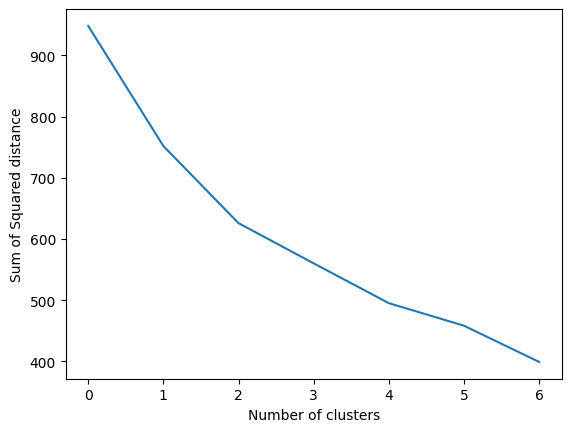

In [22]:
# Plot elbow curve to find the best k
from sklearn.cluster import KMeans
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, max_iter=50)
    kmeans.fit(scaled_countries)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared distance')

In [27]:
# Silhouette analysis
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, n_init=10, max_iter=50)
    kmeans.fit(scaled_countries)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_countries, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.2904688023861167
For n_clusters=3, the silhouette score is 0.2779707425557981
For n_clusters=4, the silhouette score is 0.29395380489593315
For n_clusters=5, the silhouette score is 0.20858540676436188
For n_clusters=6, the silhouette score is 0.29681586681253824
For n_clusters=7, the silhouette score is 0.24271677922498003
For n_clusters=8, the silhouette score is 0.23788739616836954


There seems to be an elbow at k=2. Also, 2 has a slightly better silhouette score than 3.

In [30]:
# Using 2 clusters and refitting kmeans model
kmeans = KMeans(n_clusters = 2,random_state = 42, n_init=10)
kmeans.fit(scaled_countries)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [31]:
# Number of records in every cluster
pd.Series(kmeans.labels_).value_counts()

0    91
1    60
Name: count, dtype: int64

In [32]:
# Put the countries into clusters
cluster_labels = kmeans.fit_predict(scaled_countries)
predictions = kmeans.labels_
kmeans_countries = pd.DataFrame(countries)
kmeans_countries['KMeans_Clusters'] = predictions
v.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,KMeans_Clusters
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650,1
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480,1
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,1
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1
5,United States,7.3,12.4,17.90,15.8,49400,1.22,78.7,1.93,48400,0
6,Bolivia,46.6,41.2,4.84,34.3,5410,8.78,71.6,3.20,1980,1
7,Turkey,19.1,20.4,6.74,25.5,18000,7.01,78.2,2.15,10700,0
8,Georgia,16.5,35.0,10.10,52.8,6730,8.55,72.8,1.92,2960,0
9,Lesotho,99.7,39.4,11.10,101.0,2380,4.15,46.5,3.30,1170,1


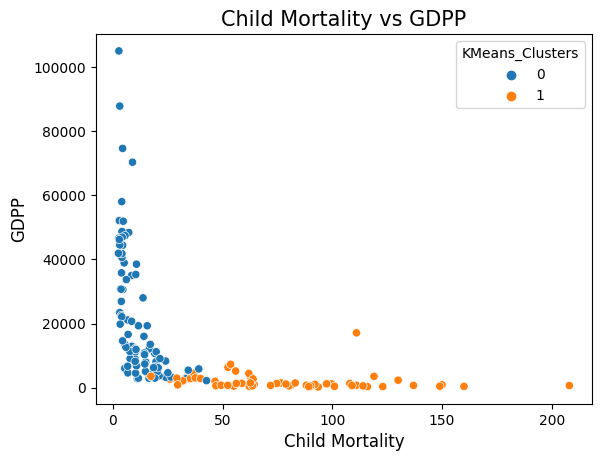

In [35]:
# Visualization of clusters with health factor 'child_mort' and economic factor 'gdpp'
sns.scatterplot(x='child_mort', y='gdpp', hue='KMeans_Clusters', data=kmeans_countries) 
plt.title("Child Mortality vs GDPP", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.show()

## Hierarchical Clustering

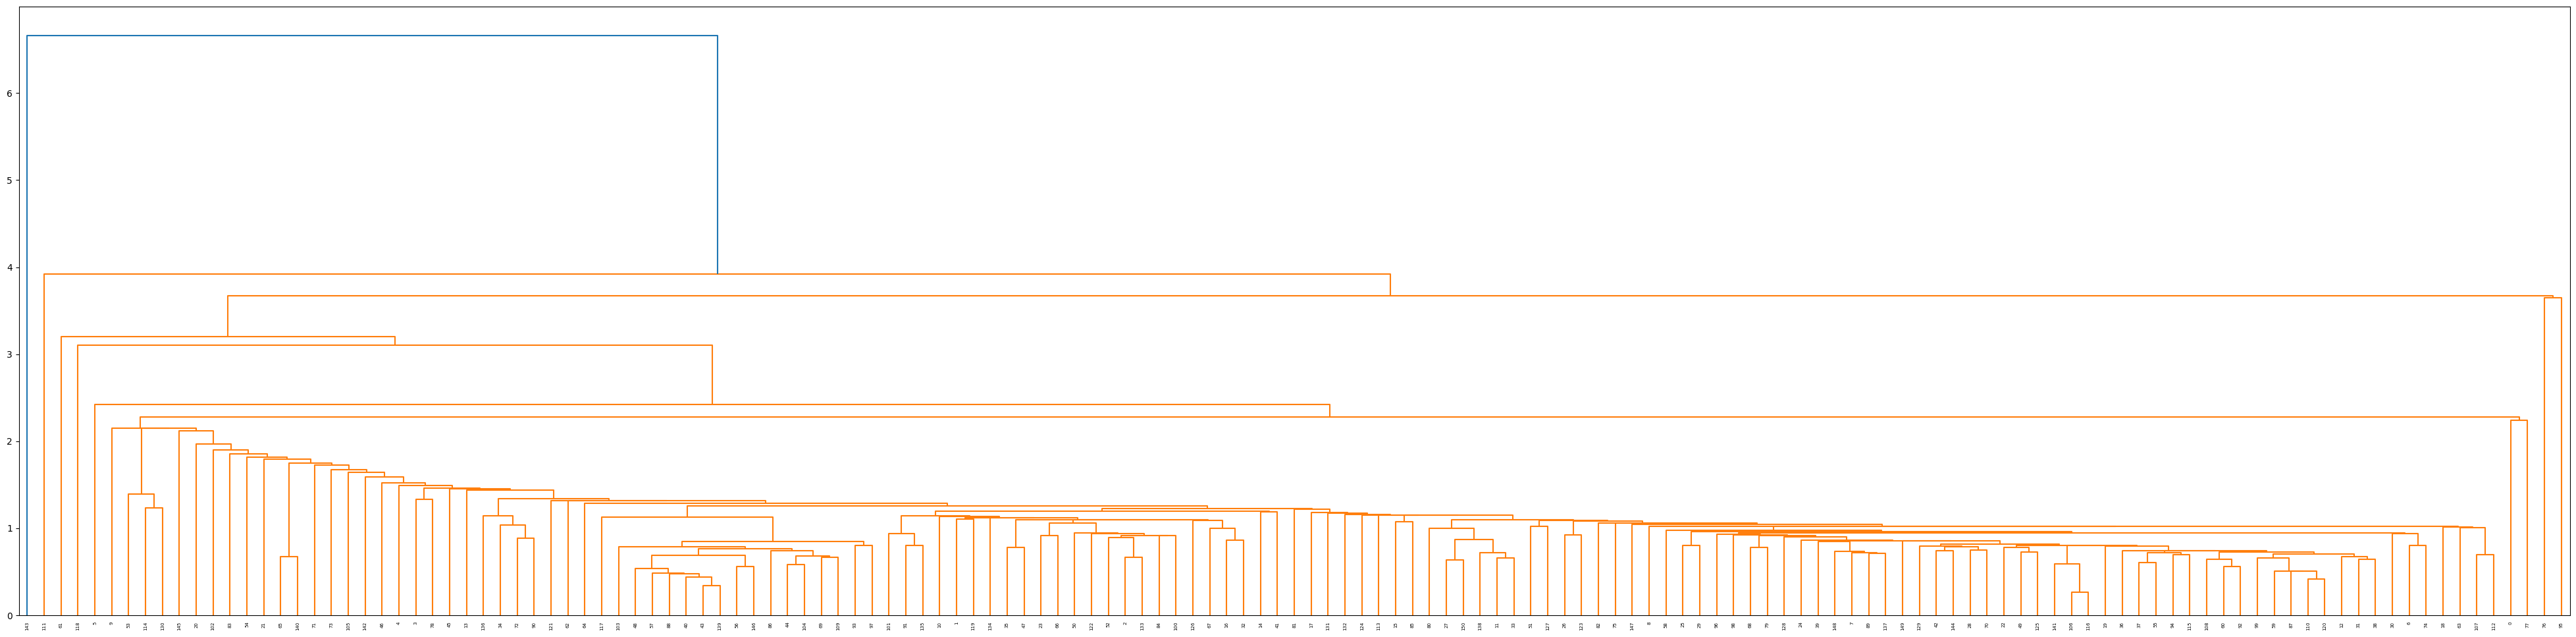

In [39]:
import scipy.cluster.hierarchy as hcluster
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_countries,method='single', metric='euclidean'))

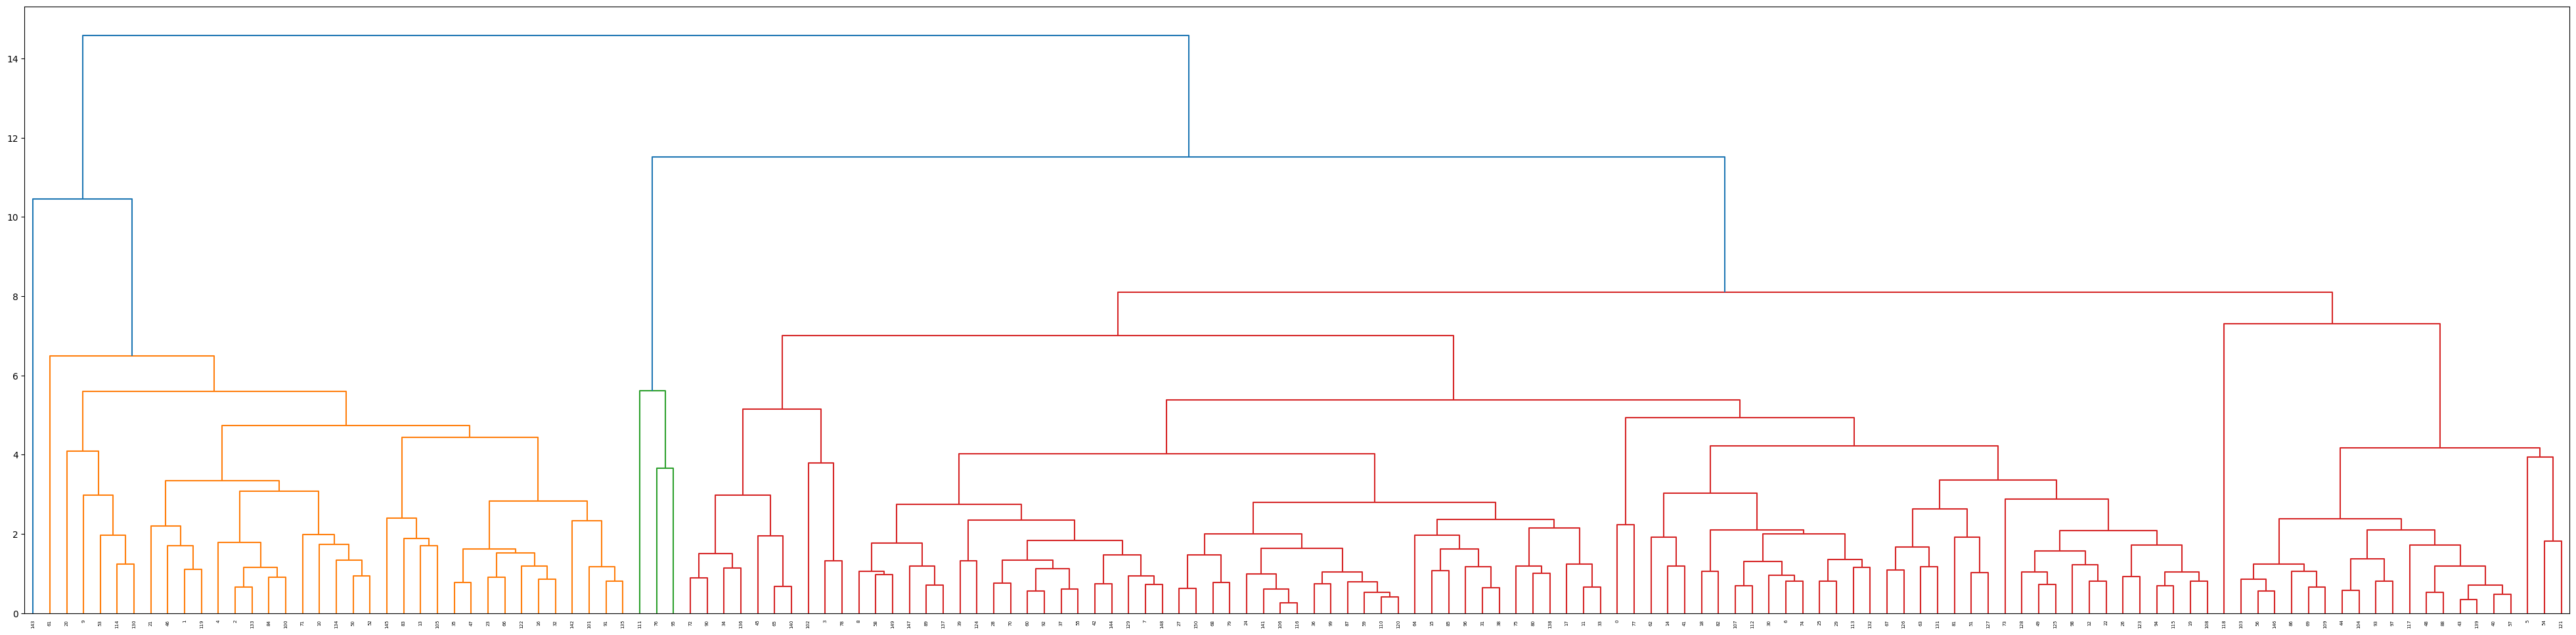

In [40]:
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_countries,method="complete", metric='euclidean'))

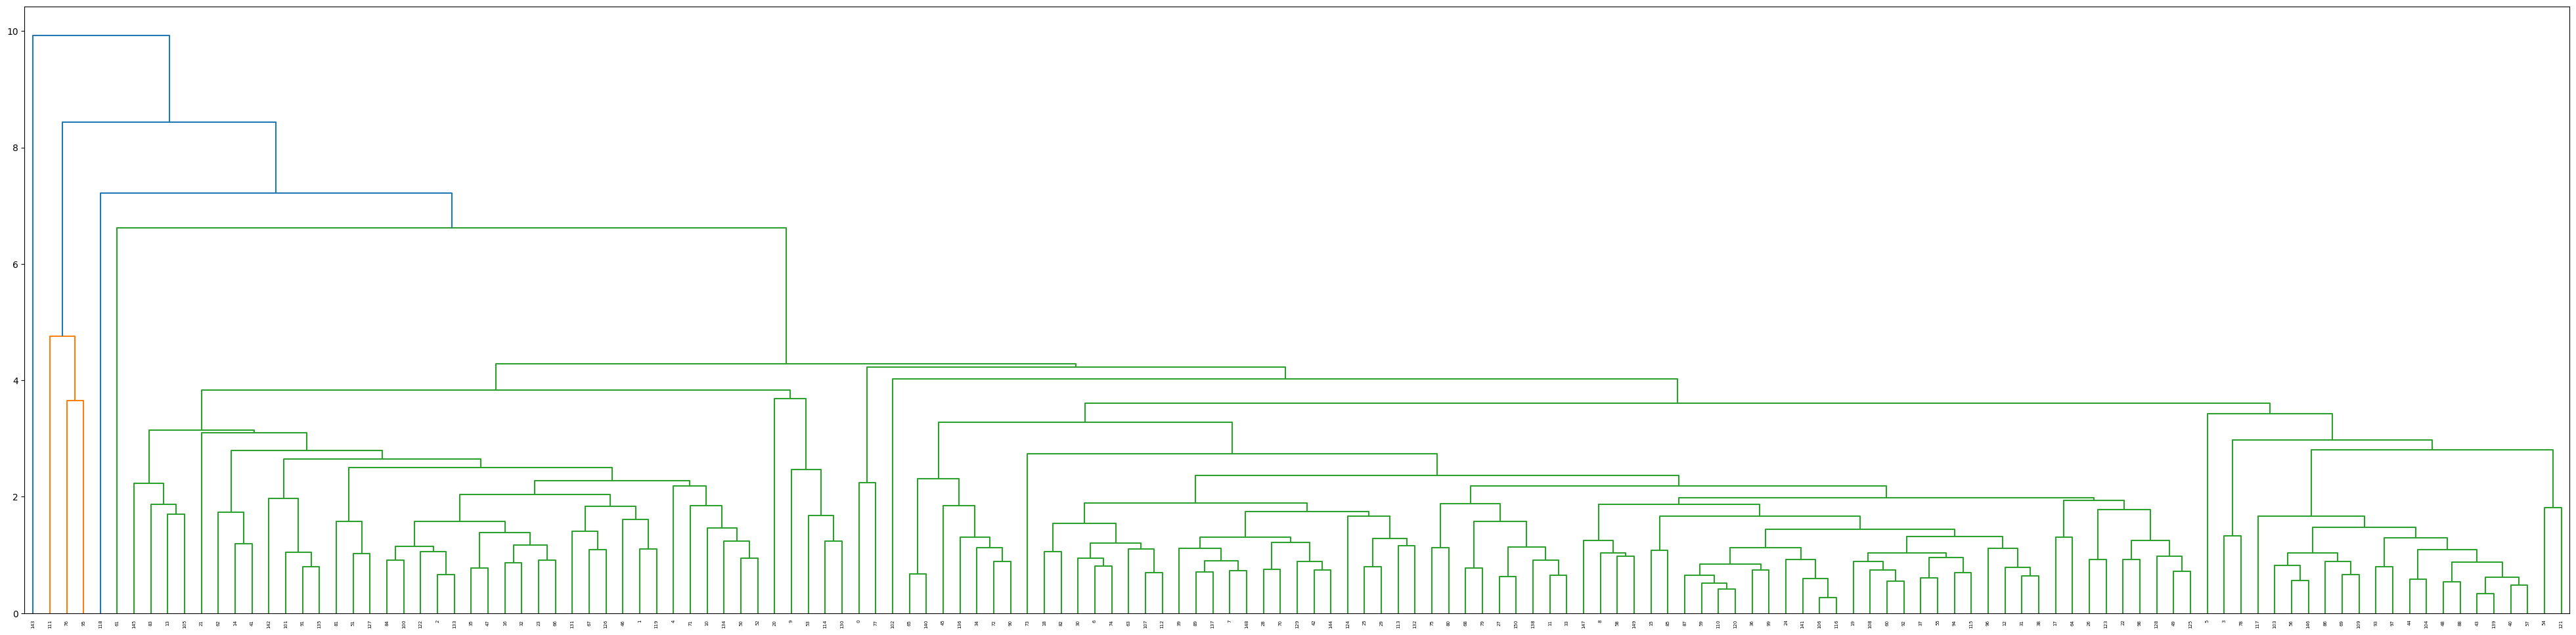

In [41]:
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_countries,method="average", metric='euclidean'))

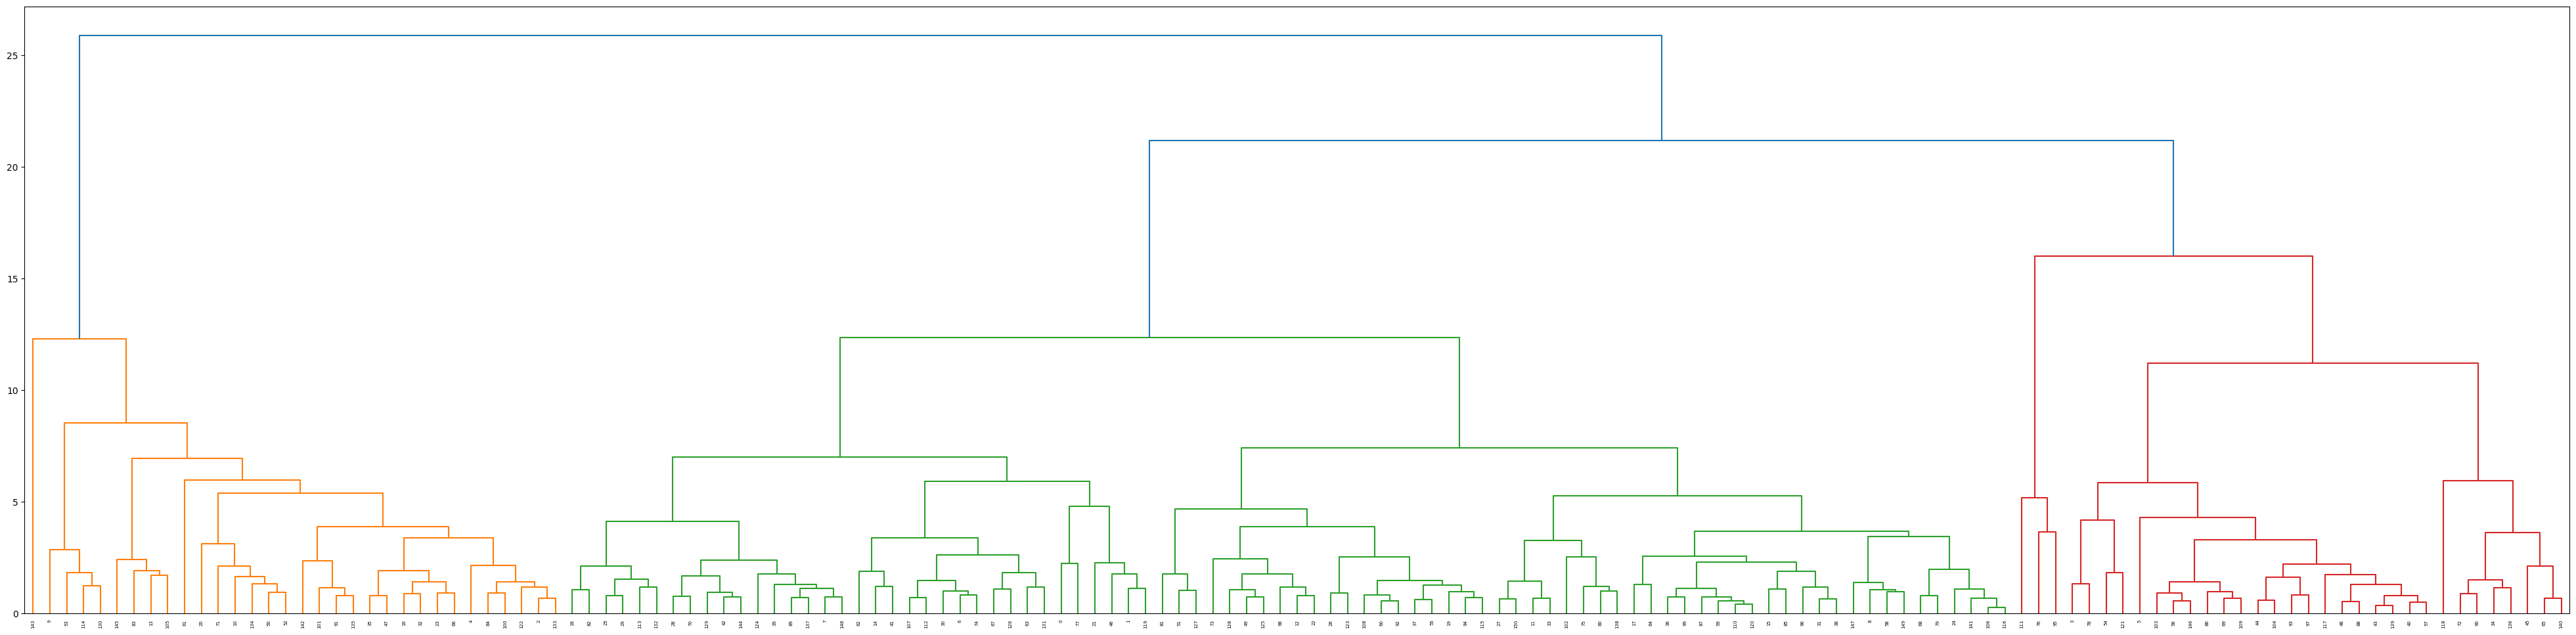

In [42]:
plt.figure(figsize=(50, 12))
dend=hcluster.dendrogram(hcluster.linkage(scaled_countries,method="ward", metric='euclidean'))

Method 'ward' shows 3 rather even clusters, therefore using 3.

In [45]:
from sklearn.cluster import AgglomerativeClustering
hcluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')  
hcluster.fit_predict(scaled_countries)
hcluster_label = hcluster.labels_
hcluster_countries = pd.DataFrame(countries)
hcluster_countries['hcluster'] = hcluster_label
hcluster_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,hcluster
0,Mongolia,26.1,46.7,5.44,56.7,7710,39.20,66.2,2.64,2650,2
1,Sudan,76.7,19.7,6.32,17.2,3370,19.60,66.3,4.88,1480,2
2,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459,1
3,Belgium,4.5,76.4,10.70,74.7,41100,1.88,80.0,1.86,44400,0
4,"Congo, Dem. Rep.",116.0,41.1,7.91,49.6,609,20.80,57.5,6.54,334,1


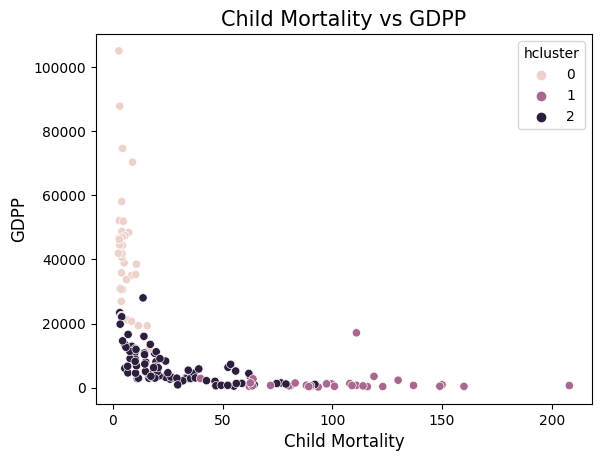

In [46]:
# Visualization of clusters with health factor 'child_mort' and economic factor 'gdpp'
sns.scatterplot(x='child_mort', y='gdpp', hue='hcluster', data=hcluster_countries) 
plt.title("Child Mortality vs GDPP", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.show()

In [47]:
hcluster_countries['hcluster'].value_counts()

hcluster
2    86
0    33
1    32
Name: count, dtype: int64

## PCA reduction

In [65]:
# K-means
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_countries)
pca_k = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_k["K-Cluster"] =  kmeans.labels_
pca_k.head()

,x1,x2,K-Cluster
0,-0.963435,0.658502,1
1,-2.319607,-0.659672,1
2,-2.972960,0.259851,1
3,3.044766,0.627254,0
4,-3.177162,1.088177,1


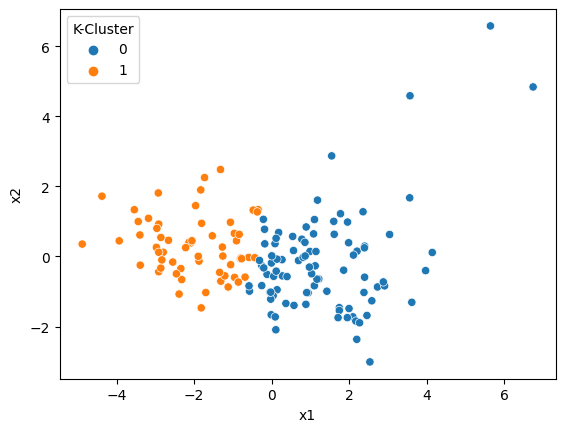

In [66]:
sns.scatterplot(data=pca_k,x='x1', y='x2', hue='K-Cluster')
plt.show()

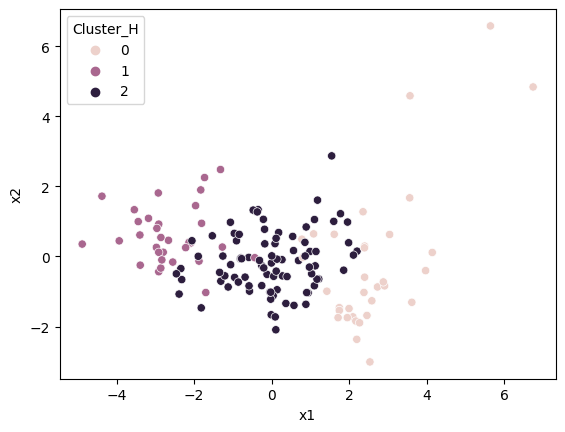

In [67]:
# Hierarchical
pca_h = pd.DataFrame.from_records(data=pca_data, columns=["x1","x2"])
pca_h["Cluster_H"] =  hcluster_label
sns.scatterplot(data=pca_h,x='x1', y='x2', hue='Cluster_H')
plt.show()

In [70]:
pca_k.query('x1<-3.0')

,x1,x2,K-Cluster
4,-3.177162,1.088177,1
20,-3.390233,-0.248336,1
61,-4.378308,1.719527,1
91,-3.543031,1.333545,1
101,-3.441974,0.995359,1
135,-3.399180,0.612437,1
142,-3.932516,0.445529,1
143,-4.887892,0.353501,1


In [76]:
countries.iat[20, 0]

'Sierra Leone'

Conclusion: Based on the dataset, I would advice to give financial aid to Sierra Leone, as it has the lowest negative values in both dimensions of this analysis.